`Problem Statement:`
   - Ola was facing sudden rise in driver atrition rate which was significantally effecting their operational efficiency and recruitment cost.

`Objective:`
- My objective is to find the pattern between the drivers who had left their job betweeen 2019 to 2021 and Build and evaluate Machine learning models to predict driver attrition and provide insights for improving retention.

In [ ]:
import pandas as pd
df=pd.read_csv(r'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv')

# Understanding

In [ ]:
df.info()
df=df.drop('Unnamed: 0',axis=1)#removed unnessary column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
df.head(10)

/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [ ]:
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
df.shape

(19104, 13)

#### Converting To DateTime Datatype

In [ ]:
df['Dateofjoining']=pd.to_datetime(df['Dateofjoining'],errors='coerce')
df['LastWorkingDate']=pd.to_datetime(df['LastWorkingDate'],errors='coerce')
df

/tmp/ipython-input-733293316.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dateofjoining']=pd.to_datetime(df['Dateofjoining'],errors='coerce')
/tmp/ipython-input-733293316.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['LastWorkingDate']=pd.to_datetime(df['LastWorkingDate'],errors='coerce')


,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08/01/20,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3
19100,09/01/20,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3
19101,10/01/20,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2
19102,11/01/20,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2


#### Checking NULL Values

In [ ]:
#detect The Columns with null values
df.isnull().sum()

,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488
Joining Designation,0


Most of the Null values were in `LastWorkingDate`

# Data Cleaning And Preparation

##### Filling Null Values

In [ ]:
df['Age']=df['Age'].fillna(int(df['Age'].mean()))                         #filling null values of age with the mean age
mode=df['Gender'].mode()
df['Gender']=df['Gender'].fillna(int(mode[0]))                            #filling null values of gender with the mode gender
df.isnull().sum()
df=df.rename(columns={'MMM-YY':'Reportingdate'})                          #changed the mmm-yy column to reportingdate column for better understanding


##### Changed To Appropriate Datatype

In [ ]:
df['Gender']=df['Gender'].astype(int)
df['Age']=df['Age'].astype(int)

In [ ]:
# IQR Method To Detect Outliers
q1 = df['Total Business Value'].quantile(0.25)
q3 = df['Total Business Value'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['Total Business Value'] < lower_bound) | (df['Total Business Value'] > upper_bound)]
print('No. Of Outliers :',outliers.shape[0])

No. Of Outliers : 1371


Their Is NO Point In Removing The Outlier Cause It Will Affect The Data And The Performance Of Every Driver Is Important So WE Will Keep The Outlier As It Is.

#### Creating `Tenure_Days` From `Last_working_date` and `joining_date`

In [ ]:
df['Tenure_Days']=(df['LastWorkingDate']-df['Dateofjoining']).dt.days
df

,Reportingdate,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Tenure_Days
0,01/01/19,1,28,0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,NaN
1,02/01/19,1,28,0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,NaN
2,03/01/19,1,28,0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,77.0
3,11/01/20,2,31,0,C7,2,67016,2020-11-06,NaT,2,2,0,1,NaN
4,12/01/20,2,31,0,C7,2,67016,2020-11-06,NaT,2,2,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08/01/20,2788,30,0,C27,2,70254,2020-06-08,NaT,2,2,740280,3,NaN
19100,09/01/20,2788,30,0,C27,2,70254,2020-06-08,NaT,2,2,448370,3,NaN
19101,10/01/20,2788,30,0,C27,2,70254,2020-06-08,NaT,2,2,0,2,NaN
19102,11/01/20,2788,30,0,C27,2,70254,2020-06-08,NaT,2,2,200420,2,NaN


#### Target Column

In [ ]:
import numpy as np
df["Target"] = np.where(df["LastWorkingDate"].notna(), 1, 0)

In [ ]:
gopi=df["Target"].sum()
print(f"Driver Left: {gopi}")

Driver Left: 1616


Target Columns contains the Drivers left and stayed Data in binary form
- `0` means Driver is Working
- `1`   means Driver has Resigned

#### TotalBussinessValue

In [ ]:
df.groupby(df['Total Business Value'] < 0)['Target'].sum()

,Target
Total Business Value,
False,1585
True,31


False means `Total Business Value` > `0`  ( Drivers Has Positive TotalBussinessValue )

True  means `Total Business Value` < `0`  ( Drivers Has Negative TotalBussinessValue )

* Total Business Value alone is not a strong direct indicator of driver attrition, as both churners and non-churners can have positive or negative values.






## **Visulization (Univariate Analysis)**



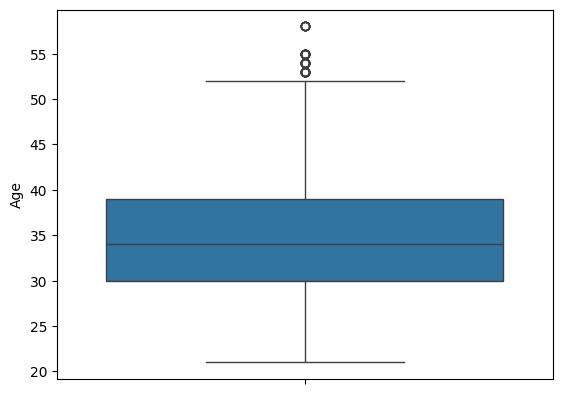

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(y=df['Age'])
plt.show()

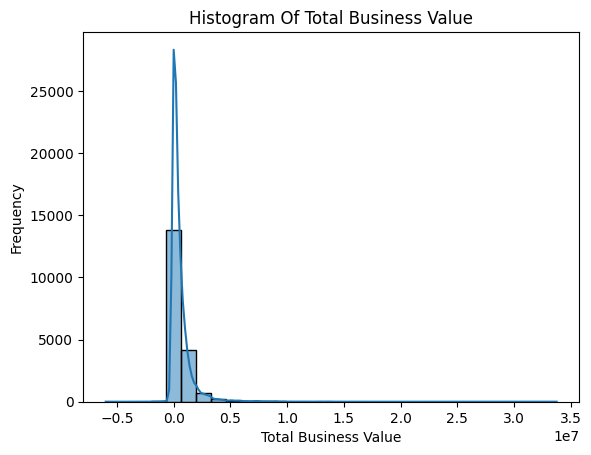

In [ ]:
sns.histplot(data=df,x='Total Business Value',bins=30,kde=True)
plt.title("Histogram Of Total Business Value")
plt.ylabel('Frequency')
plt.show()


- **X-axis:** Total Business Value  
- **Y-axis:** Frequency  
- **Observation:** The distribution is highly skewed, suggesting the presence of outliers or extreme high values.  

### **Visualization (Bivariate Analysis)**

<Axes: >

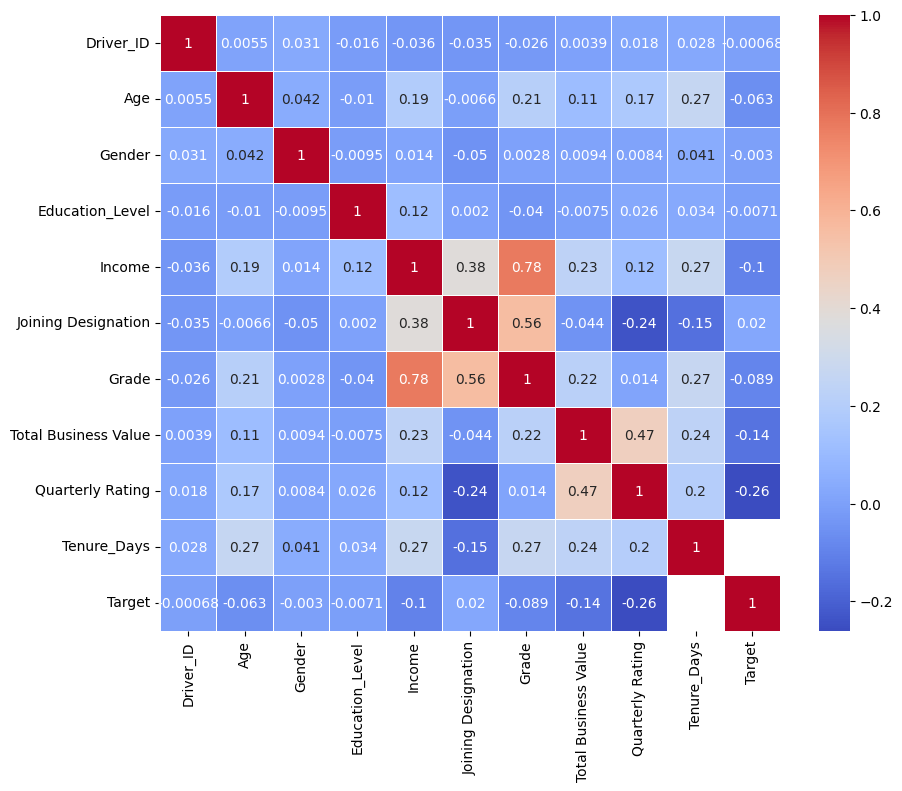

In [ ]:
numeric_df=df.select_dtypes(include='number')
corr=numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.5)

**The Columns Are Not That Correlated :**    
      

*   Most Correlated: Grade-Income
*   Least Correlated: Quarterly Rating - Target





In [ ]:
#converted ReportDate In Datetime Format
df['Reportingdate']=pd.to_datetime(df['Reportingdate'],errors='coerce')
df

/tmp/ipython-input-2591182952.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Reportingdate']=pd.to_datetime(df['Reportingdate'],errors='coerce')


,Reportingdate,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Tenure_Days,Target
0,2019-01-01,1,28,0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,NaN,0
1,2019-02-01,1,28,0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,NaN,0
2,2019-03-01,1,28,0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,77.0,1
3,2020-11-01,2,31,0,C7,2,67016,2020-11-06,NaT,2,2,0,1,NaN,0
4,2020-12-01,2,31,0,C7,2,67016,2020-11-06,NaT,2,2,0,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30,0,C27,2,70254,2020-06-08,NaT,2,2,740280,3,NaN,0
19100,2020-09-01,2788,30,0,C27,2,70254,2020-06-08,NaT,2,2,448370,3,NaN,0
19101,2020-10-01,2788,30,0,C27,2,70254,2020-06-08,NaT,2,2,0,2,NaN,0
19102,2020-11-01,2788,30,0,C27,2,70254,2020-06-08,NaT,2,2,200420,2,NaN,0


In [ ]:
df.groupby('Education_Level')['Income'].mean()

,Income
Education_Level,
0,60644.080670
1,66362.592366
2,69561.404299


* Higher Education Means Higher Payment

In [ ]:
#Checking If Income Is A Reasone for Driver's Attrition
df.groupby('Target')['Income'].mean()

,Income
Target,
0,66600.170631
1,55391.400990


* Lower Income Is A Reason For Driver's Attrition

In [ ]:
df.groupby('Target')['Age'].mean().astype(int)

,Age
Target,
0,34
1,33


* The Younger Drivers are Most Likely To Leave

#### Made A Column `Tenure_Group` To Understand It Better

In [ ]:
df['Tenure_Group'] = pd.cut(df['Tenure_Days'], bins=[0, 30, 90, 180, 365, 730, 1095, df['Tenure_Days'].max()],
                            labels=['0-30', '31-90', '91-180', '181-365', '1-2Y', '2-3Y', '3Y+'])

grouped = df.groupby('Tenure_Group', observed=False)['Target'].sum()
grouped

,Target
Tenure_Group,
0-30,56
31-90,295
91-180,471
181-365,360
1-2Y,220
2-3Y,74
3Y+,136


<BarContainer object of 7 artists>

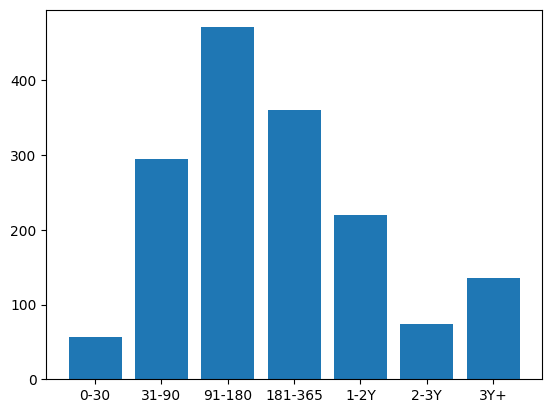

In [ ]:
plt.bar(x=grouped.index, height=grouped.values)

**Driver attrition is most likely to occur between 91 to 365 days of tenure.**

*  The **highest attrition** is observed in the **91–180 days** range, with 471 drivers leaving.
*  The **second highest** occurs in the **181–365** days range, with 360 drivers leaving.


*  This **trend suggests** that drivers are more prone to leave after **3 to 12 months of employment—possibly** due to job dissatisfaction, unmet expectations, or lack of engagement during the post-onboarding phase.





In [ ]:
df

,Reportingdate,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Tenure_Days,Target,Tenure_Group
0,2019-01-01,1,28,0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,NaN,0,NaN
1,2019-02-01,1,28,0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,NaN,0,NaN
2,2019-03-01,1,28,0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,77.0,1,31-90
3,2020-11-01,2,31,0,C7,2,67016,2020-11-06,NaT,2,2,0,1,NaN,0,NaN
4,2020-12-01,2,31,0,C7,2,67016,2020-11-06,NaT,2,2,0,1,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30,0,C27,2,70254,2020-06-08,NaT,2,2,740280,3,NaN,0,NaN
19100,2020-09-01,2788,30,0,C27,2,70254,2020-06-08,NaT,2,2,448370,3,NaN,0,NaN
19101,2020-10-01,2788,30,0,C27,2,70254,2020-06-08,NaT,2,2,0,2,NaN,0,NaN
19102,2020-11-01,2788,30,0,C27,2,70254,2020-06-08,NaT,2,2,200420,2,NaN,0,NaN


In [ ]:
df["Reportingdate"]

,Reportingdate
0,2019-01-01
1,2019-02-01
2,2019-03-01
3,2020-11-01
4,2020-12-01
...,...
19099,2020-08-01
19100,2020-09-01
19101,2020-10-01
19102,2020-11-01


In [ ]:
df["Tenure_Days"] = df["Tenure_Days"].fillna(
abs((pd.to_datetime("2020-12-01") - pd.to_datetime(df["Dateofjoining"])).dt.days)
)


In [ ]:
df['Tenure_Group'] = pd.cut(df['Tenure_Days'], bins=[0, 30, 90, 180, 365, 730, 1095, df['Tenure_Days'].max()],
                            labels=['0-30', '31-90', '91-180', '181-365', '1-2Y', '2-3Y', '3Y+'])

grouped = df.groupby('Tenure_Group', observed=False)['Target'].sum()
grouped

,Target
Tenure_Group,
0-30,56
31-90,295
91-180,471
181-365,360
1-2Y,220
2-3Y,74
3Y+,136


<Axes: >

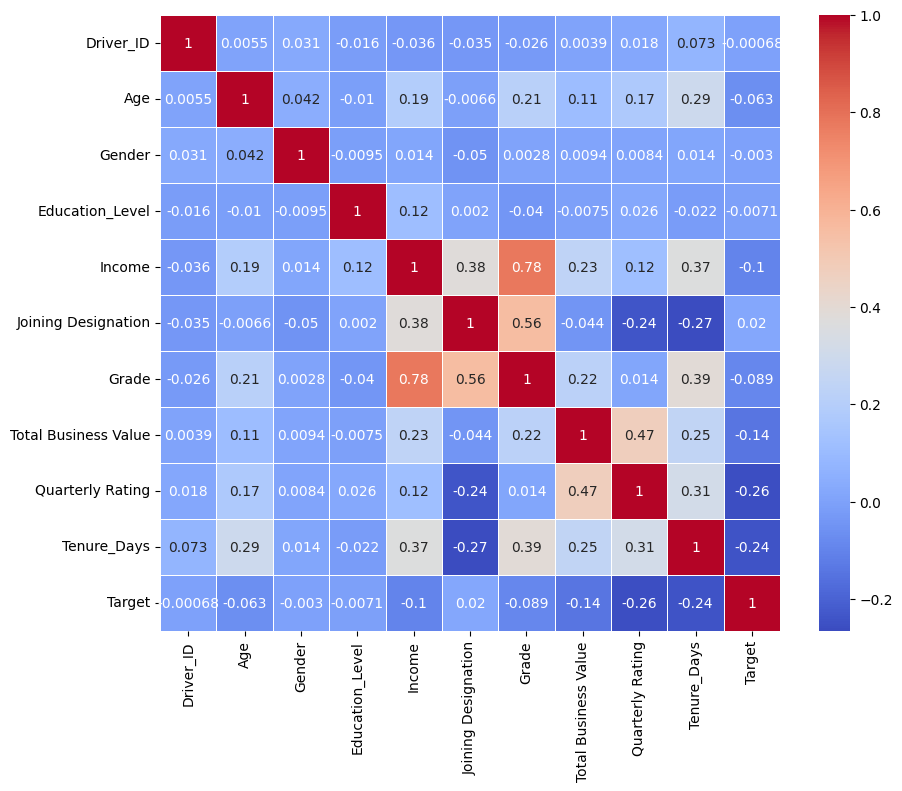

In [ ]:
numeric_df=df.select_dtypes(include='number')
corr=numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.5)

## Correlation Heatmap Analysis

The heatmap below shows the **pairwise correlation** between features in the dataset. This visualization helps identify which variables are strongly related, weakly related, or inversely related.

### Key Observations:

- `Income`, `Grade`, and `Joining Designation` are **highly correlated** with each other:
  - **Income vs Grade**: 0.78
  - **Income vs Joining Designation**: 0.38
  - **Grade vs Joining Designation**: 0.56

- `Target` has **negative correlations** with:
  - `Quarterly Rating`: **-0.26**
  - `Tenure_Days`: **-0.24**
  - `Total Business Value`: **-0.14**

- `Age` and `Tenure_Days` show a **moderate positive correlation**: **0.29**

- `Driver_ID` shows almost **no meaningful correlation**, as expected since it's just an identifier.

### Conclusion:

- Variables like `Income`, `Grade`, `Quarterly Rating`, and `Tenure_Days` could be **important features** when predicting the `Target`.
- Features with high correlation between each other (e.g., `Income` and `Grade`) may require **multicollinearity checks** before using in regression models.


In [ ]:
df = pd.get_dummies(df, columns=['Joining Designation', 'Education_Level', 'City'], drop_first=True)

In [ ]:
df

,Reportingdate,Driver_ID,Age,Gender,Income,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Quarterly Rating,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,2019-01-01,1,28,0,57387,2018-12-24,NaT,1,2381060,2,...,False,False,False,False,False,False,False,False,False,False
1,2019-02-01,1,28,0,57387,2018-12-24,NaT,1,-665480,2,...,False,False,False,False,False,False,False,False,False,False
2,2019-03-01,1,28,0,57387,2018-12-24,2019-03-11,1,0,2,...,False,False,False,False,False,False,False,False,False,False
3,2020-11-01,2,31,0,67016,2020-11-06,NaT,2,0,1,...,False,False,False,False,False,False,False,True,False,False
4,2020-12-01,2,31,0,67016,2020-11-06,NaT,2,0,1,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30,0,70254,2020-06-08,NaT,2,740280,3,...,True,False,False,False,False,False,False,False,False,False
19100,2020-09-01,2788,30,0,70254,2020-06-08,NaT,2,448370,3,...,True,False,False,False,False,False,False,False,False,False
19101,2020-10-01,2788,30,0,70254,2020-06-08,NaT,2,0,2,...,True,False,False,False,False,False,False,False,False,False
19102,2020-11-01,2788,30,0,70254,2020-06-08,NaT,2,200420,2,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
#removing irrelevent columns
# List of columns to remove
cols_to_drop = ['Reportingdate', 'Driver_ID', 'Dateofjoining', 'LastWorkingDate']

# Drop the columns
df = df.drop(columns=cols_to_drop)

In [ ]:
df

,Age,Gender,Income,Grade,Total Business Value,Quarterly Rating,Tenure_Days,Target,Tenure_Group,Joining Designation_2,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,28,0,57387,1,2381060,2,708.0,0,1-2Y,False,...,False,False,False,False,False,False,False,False,False,False
1,28,0,57387,1,-665480,2,708.0,0,1-2Y,False,...,False,False,False,False,False,False,False,False,False,False
2,28,0,57387,1,0,2,77.0,1,31-90,False,...,False,False,False,False,False,False,False,False,False,False
3,31,0,67016,2,0,1,25.0,0,0-30,True,...,False,False,False,False,False,False,False,True,False,False
4,31,0,67016,2,0,1,25.0,0,0-30,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,30,0,70254,2,740280,3,176.0,0,91-180,True,...,True,False,False,False,False,False,False,False,False,False
19100,30,0,70254,2,448370,3,176.0,0,91-180,True,...,True,False,False,False,False,False,False,False,False,False
19101,30,0,70254,2,0,2,176.0,0,91-180,True,...,True,False,False,False,False,False,False,False,False,False
19102,30,0,70254,2,200420,2,176.0,0,91-180,True,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Age                    19104 non-null  int64   
 1   Gender                 19104 non-null  int64   
 2   Income                 19104 non-null  int64   
 3   Grade                  19104 non-null  int64   
 4   Total Business Value   19104 non-null  int64   
 5   Quarterly Rating       19104 non-null  int64   
 6   Tenure_Days            19104 non-null  float64 
 7   Target                 19104 non-null  int64   
 8   Tenure_Group           19100 non-null  category
 9   Joining Designation_2  19104 non-null  bool    
 10  Joining Designation_3  19104 non-null  bool    
 11  Joining Designation_4  19104 non-null  bool    
 12  Joining Designation_5  19104 non-null  bool    
 13  Education_Level_1      19104 non-null  bool    
 14  Education_Level_2      19104 non-null 

In [ ]:
df=df.drop(columns=['Tenure_Group'])

# Model

`Libraries & Their Usage`

1. **sklearn.model_selection**
   - `train_test_split`: Split dataset into training & testing sets.
   - `GridSearchCV`: Hyperparameter tuning with cross-validation.
   - `StratifiedKFold`: Cross-validation that preserves class balance in each fold.

2. **sklearn.preprocessing**
   - `StandardScaler`: Standardize numerical features (mean=0, std=1).
   - `OneHotEncoder`: Convert categorical variables into binary vectors.

3. **sklearn.compose**
   - `ColumnTransformer`: Apply different preprocessing steps to numeric vs categorical columns.

4. **sklearn.pipeline**
   - `Pipeline`: Chain preprocessing + model into one workflow.

5. **sklearn.impute**
   - `KNNImputer`: Fill missing values using nearest neighbors.

6. **sklearn.metrics**
   - `classification_report`: Precision, recall, f1-score summary.
   - `roc_auc_score`: ROC AUC metric (model discrimination ability).
   - `roc_curve`: Get points for ROC curve plot.
   - `confusion_matrix`: Count TP, TN, FP, FN.
   - `ConfusionMatrixDisplay`: Visual display of confusion matrix.

7. **sklearn.linear_model**
   - `LogisticRegression`: Logistic regression classifier.

8. **imblearn.over_sampling**
   - `SMOTE`: Handle class imbalance by generating synthetic minority samples.

9. **imblearn.pipeline**
   - `Pipeline (ImbPipeline)`: Similar to sklearn’s pipeline, but supports imbalanced-learn steps like SMOTE.

10. **matplotlib.pyplot**
    - For plotting ROC curves, confusion matrices, and feature importance graphs.


# Logistic Regression

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best hyperparameters: {'clf__C': 0.1, 'clf__penalty': 'l1'}

Classification Report:
               precision    recall  f1-score   support

           0     0.9829    0.6918    0.8121      3498
           1     0.2068    0.8700    0.3341       323

    accuracy                         0.7069      3821
   macro avg     0.5949    0.7809    0.5731      3821
weighted avg     0.9173    0.7069    0.7717      3821

ROC AUC: 0.8648135068778798


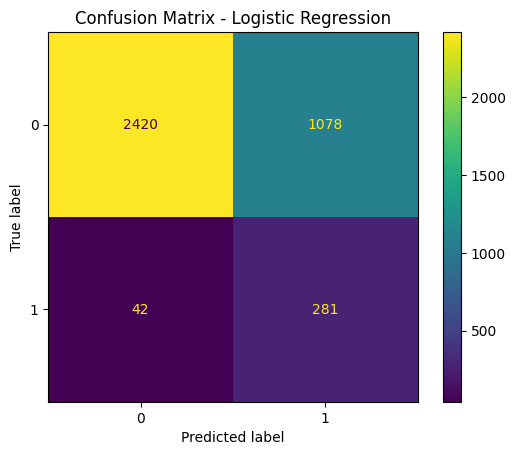

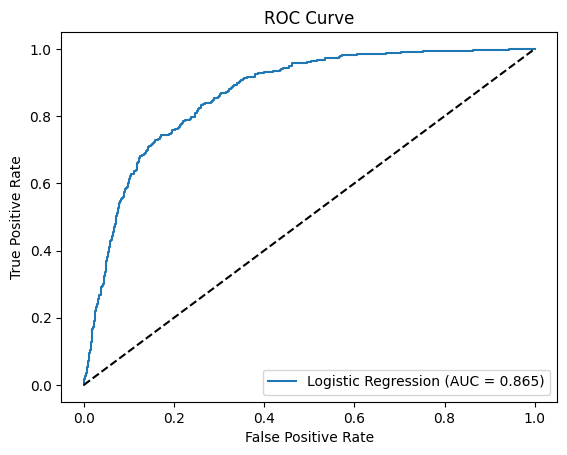

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import matplotlib.pyplot as plt

# ==== 2. Load data (aggregated driver features) ====
agg_final = df # use the aggregated dataset from previous step

# ==== 3. Split X/y ====
y = agg_final['Target']
X = agg_final.drop(columns=['Target'])

# ==== 4. Identify numeric and categorical features ====
numeric_features = X.select_dtypes(include=['number']).columns.tolist()
cat_features = X.select_dtypes(include=['object','category']).columns.tolist()

# ==== 5. Preprocessing pipelines ====
numeric_transformer = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', cat_transformer, cat_features)
], remainder='drop')

# ==== 6. Train-test split (stratified) ====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==== 7. Logistic Regression inside pipeline with SMOTE ====
steps = [
    ('preproc', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=1000))
]

pipeline = ImbPipeline(steps=steps)

# ==== 8. Hyperparameter tuning (optional) ====
param_grid = {
    'clf__C': [0.01, 0.1, 1, 10],   # regularization strength
    'clf__penalty': ['l1','l2']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

best_model_lr = grid.best_estimator_
print("Best hyperparameters:", grid.best_params_)

# ==== 9. Predict & evaluate ====
y_pred = best_model_lr.predict(X_test)
y_proba = best_model_lr.predict_proba(X_test)[:,1]
y_pred_new = (y_proba >= 0.4).astype(int)
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

# ROC AUC
auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", auc)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


`Logistic Regression – Model Insights`

1. **Model Performance**
   - Accuracy: ~71%
   - ROC AUC: 0.865 → strong class separation
   - Best Params: C=0.1 (strong regularization), Penalty=L1 (feature selection effect)

2. **Class-wise Results**
   - Class 0: Precision = 0.98, Recall = 0.69 → some false positives
   - Class 1: Precision = 0.21, Recall = 0.87 → high recall, many false positives
   - Model prioritizes recall for minority class (1)

3. **Confusion Matrix Behavior**
   - Few false negatives → positives are rarely missed
   - Higher false positives → negatives often misclassified as positives

4. **Feature Importance**
   - Positive coefficients → increase probability of class 1
   - Negative coefficients → decrease probability of class 1
   - L1 penalty zeroed out irrelevant features, leaving only key drivers

5. **Business Interpretation**
   - ✅ Good when missing positives is costly (e.g., fraud, churn, safety incidents)
   - ⚠️ Not ideal if false alarms (false positives) are expensive
   - Threshold tuning can improve precision-recall balance


Error: 'best_model_lr' or its components are not fitted. Please run the Logistic Regression model training cell first.


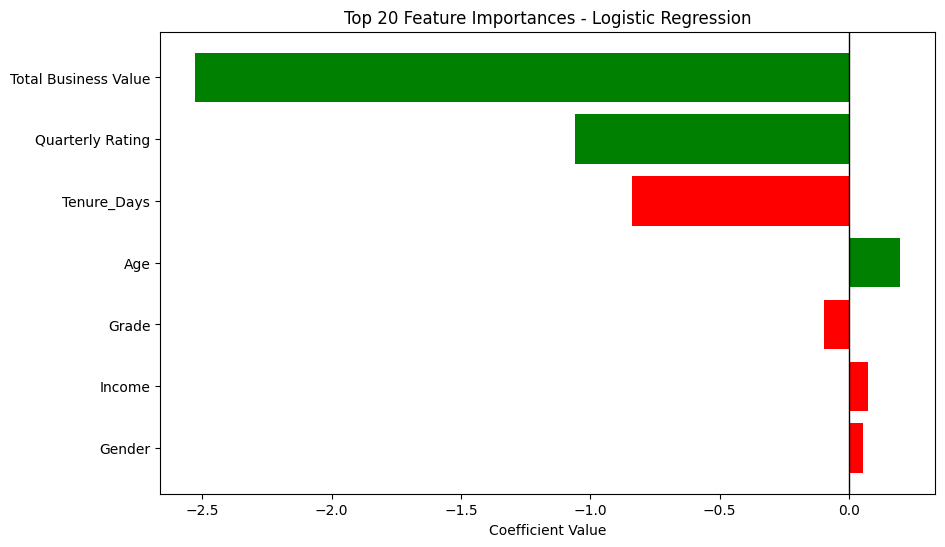

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==== 1. Get feature names (numeric + encoded categorical) ====
numeric_features = X.select_dtypes(include=['number']).columns.tolist()
cat_features = X.select_dtypes(include=['object','category']).columns.tolist()

# Get one-hot encoded categorical feature names from pipeline
# Access the fitted preprocessor from the best_model_lr pipeline
try:
    fitted_preprocessor = best_model_lr.named_steps['preproc']
    fitted_onehot = fitted_preprocessor.named_transformers_['cat'].named_steps['onehot']
    cat_features_encoded = fitted_onehot.get_feature_names_out(cat_features)
except AttributeError:
    print("Error: 'best_model_lr' or its components are not fitted. Please run the Logistic Regression model training cell first.")
    cat_features_encoded = [] # Initialize as empty to avoid further errors


all_features = np.concatenate([numeric_features, cat_features_encoded])

# Filter out 'Target' if it somehow ended up in all_features (shouldn't happen with the way X is created, but as a safeguard)
if 'Target' in all_features:
    all_features = all_features[all_features != 'Target']


# ==== 2. Extract coefficients from Logistic Regression ====
# Ensure the classifier is fitted before accessing coef_
try:
    coef = best_model_lr.named_steps['clf'].coef_[0]   # coefficients for class 1
    importances = coef  # keep sign (positive/negative impact)
except AttributeError:
    print("Error: Logistic Regression classifier is not fitted. Please run the Logistic Regression model training cell first.")
    importances = [] # Initialize as empty

# Make sure importances and all_features have the same length before creating DataFrame
if len(all_features) > 0 and len(importances) == len(all_features):
    # ==== 3. Create dataframe ====
    feat_df = pd.DataFrame({'feature': all_features, 'importance': importances})
    feat_df['abs_importance'] = np.abs(feat_df['importance'])

    # Top 20 features by absolute importance
    feat_df = feat_df.sort_values(by='abs_importance', ascending=False).head(20)

    # ==== 4. Plot ====
    plt.figure(figsize=(10,6))
    colors = ['green' if x > 0 else 'red' for x in feat_df['importance']]  # green = positive impact, red = negative impact
    plt.barh(feat_df['feature'][::-1], feat_df['importance'][::-1], color=colors)
    plt.xlabel('Coefficient Value')
    plt.title('Top 20 Feature Importances - Logistic Regression')
    plt.axvline(0, color='black', linewidth=1)
    plt.show()
else:
    print("Could not generate feature importances plot due to previous errors or mismatch in feature/importance counts.")

`Top 20 Feature Importances – Logistic Regression`

`Main Points`
- **Total Business Value** has the strongest negative impact → pushes prediction toward the **negative class**.  
- **Quarterly Rating** and **Tenure_Days** also show strong negative effects.  
- **Age** has a positive influence → pushes prediction toward the **positive class**.  
- **Grade**, **Income**, and **Gender** have relatively small impacts.  

`Note on Positive` vs `Negative`
- 🟢 **Positive coefficient (green bar):** Increases the likelihood of the positive class.  
- 🔴 **Negative coefficient (red bar):** Increases the likelihood of the negative class.  

`Model Leaning`
- Since most high-impact features are **negative**, the model overall leans more toward predicting the **negative class**.  


# Random Forest

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best hyperparameters: {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}

Classification Report:
               precision    recall  f1-score   support

           0     0.9651    0.9734    0.9693      3498
           1     0.6826    0.6192    0.6494       323

    accuracy                         0.9435      3821
   macro avg     0.8239    0.7963    0.8093      3821
weighted avg     0.9413    0.9435    0.9422      3821

ROC AUC: 0.9401347430729989


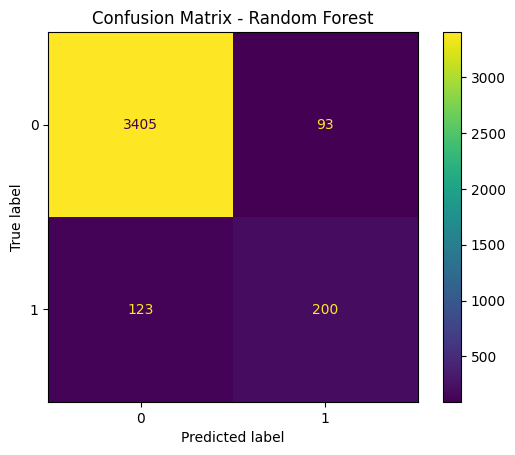

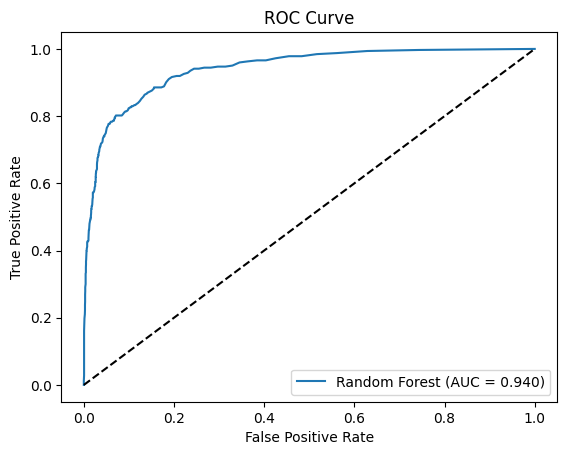

In [ ]:
# ==== 1. Import Library ====
from sklearn.ensemble import RandomForestClassifier


# ==== 2. Load data ====
agg_final = df.copy()  # replace with your aggregated dataframe
if 'Tenure_Group' in agg_final.columns:
    agg_final = agg_final.drop(columns=['Tenure_Group'])  # remove Tenure_Group

# ==== 3. Split X/y ====
y = agg_final['Target']
X = agg_final.drop(columns=['Target'])

# ==== 4. Identify numeric and categorical features ====
numeric_features = X.select_dtypes(include=['number']).columns.tolist()
cat_features = X.select_dtypes(include=['object','category']).columns.tolist()

# ==== 5. Preprocessing pipelines ====
numeric_transformer = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', cat_transformer, cat_features)
], remainder='drop')

# ==== 6. Train-test split (stratified) ====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==== 7. Random Forest with SMOTE ====
steps = [
    ('preproc', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42, class_weight='balanced'))
]

pipeline = ImbPipeline(steps=steps)

# ==== 8. Hyperparameter tuning (optional) ====
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [5, 10, None],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

best_model_rf = grid.best_estimator_
print("Best hyperparameters:", grid.best_params_)

# ==== 9. Predict & evaluate ====
y_pred = best_model_rf.predict(X_test)
y_proba = best_model_rf.predict_proba(X_test)[:,1]

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

# ROC AUCQXXAA
auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", auc)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc:.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


`Random Forest – Summary`

`Explanation`
The Random Forest model achieved high accuracy (94.35%) and a strong ROC AUC (0.94), showing excellent overall predictive power.  
It performs very well on the majority class (0), while moderately handling the minority class (1).  
This indicates good discrimination ability but some impact from class imbalance.

`Key Insights`
1. High accuracy and ROC AUC confirm strong overall model performance.  
2. Excellent precision and recall for the majority class (0).  
3. Moderate recall for the minority class (1) → some positives are missed.  
4. Precision for class 1 is decent, indicating controlled false positives.  
5. Model shows robustness to complex patterns, outperforming Logistic Regression.  


Error: 'best_model_rf' or its components are not fitted. Please run the Random Forest model training cell first.


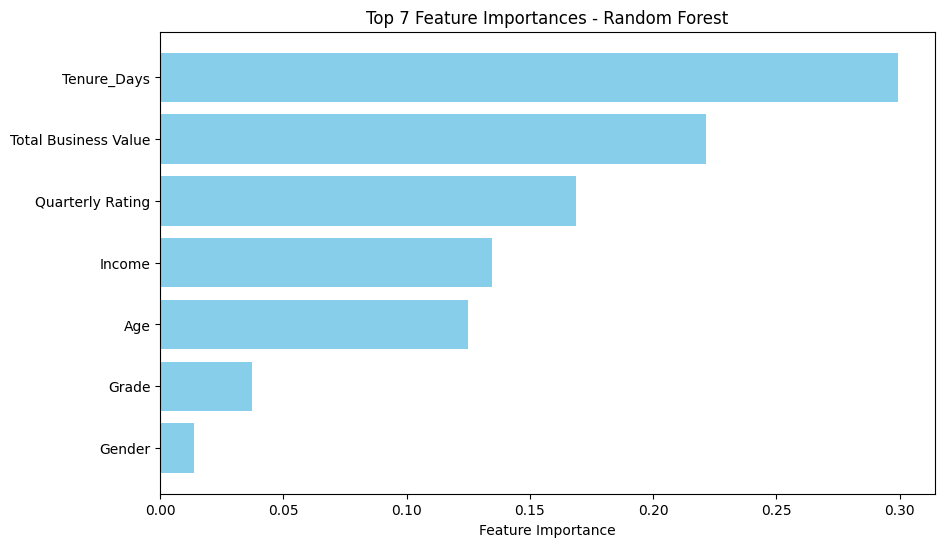

In [ ]:


# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['number']).columns.tolist()
cat_features = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist() # Include boolean as they were created from one-hot encoding

# Categorical features after one-hot encoding - access from the fitted pipeline
# Ensure best_model_rf has been fitted (e.g., by running the Random Forest cell)
try:
    cat_features_encoded = best_model_rf.named_steps['preproc']\
        .named_transformers_['cat']\
        .named_steps['onehot'].get_feature_names_out(cat_features)
except AttributeError:
    print("Error: 'best_model_rf' or its components are not fitted. Please run the Random Forest model training cell first.")
    cat_features_encoded = [] # Initialize as empty to avoid further errors


# Combine all feature names
all_features = np.concatenate([numeric_features, cat_features_encoded])

# Filter out 'Target' if it somehow ended up in all_features (shouldn't happen with the way X is created, but as a safeguard)
if 'Target' in all_features:
    all_features = all_features[all_features != 'Target']


# ==== 2. Get feature importances ====
# Ensure the classifier is fitted before accessing feature_importances_
try:
    importances = best_model_rf.named_steps['clf'].feature_importances_
except AttributeError:
    print("Error: Random Forest classifier is not fitted. Please run the Random Forest model training cell first.")
    importances = [] # Initialize as empty

# Make sure importances and all_features have the same length before creating DataFrame
if len(all_features) > 0 and len(importances) == len(all_features):
    # ==== 3. Create dataframe for plotting ====
    feat_df = pd.DataFrame({'feature': all_features, 'importance': importances})
    feat_df = feat_df.sort_values(by='importance', ascending=False).head(20)  # top 20

    # ==== 4. Plot ====
    plt.figure(figsize=(10,6))
    plt.barh(feat_df['feature'][::-1], feat_df['importance'][::-1], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.title('Top 7 Feature Importances - Random Forest')
    plt.show()
else:
    print("Could not generate feature importances plot due to previous errors or mismatch in feature/importance counts.")

`Random Forest Feature Importance Analysis`

The chart shows the **Top 7 most important features** identified by the Random Forest model. Feature importance reflects how much each feature contributes to predicting the target variable. Higher importance values indicate stronger influence.

`Key Observations:`
1. **Tenure_Days (~0.30)**  
   - Most influential predictor.  
   - Suggests that the length of tenure strongly impacts the outcome.

2. **Total Business Value (~0.22)**  
   - Second most important feature.  
   - Indicates customer/business value plays a major role in predictions.

3. **Quarterly Rating (~0.17)**  
   - Performance or satisfaction measured quarterly has significant predictive power.

4. **Income (~0.13)** and **Age (~0.12)**  
   - Both demographic/economic factors contribute moderately.  
   - Income slightly outweighs Age.

5. **Grade (~0.04)** and **Gender (~0.01)**  
   - Least influential features.  
   - These variables add minimal value to the model’s prediction.

`Insights:`
- The model relies most on **Tenure_Days** and **Business Value** for predictions.  
- Features like **Gender** and **Grade** may be less relevant and could potentially be excluded without much loss in accuracy.  
- The results highlight that customer longevity and value are stronger predictors compared to demographic attributes.

---

# XGBoost

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [22:13:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best hyperparameters: {'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.2, 'clf__max_depth': 7, 'clf__n_estimators': 200, 'clf__subsample': 1.0}

Classification Report:
               precision    recall  f1-score   support

           0     0.9800    0.8553    0.9134      3498
           1     0.3411    0.8111    0.4803       323

    accuracy                         0.8516      3821
   macro avg     0.6606    0.8332    0.6969      3821
weighted avg     0.9260    0.8516    0.8768      3821

ROC AUC: 0.9158466492130841


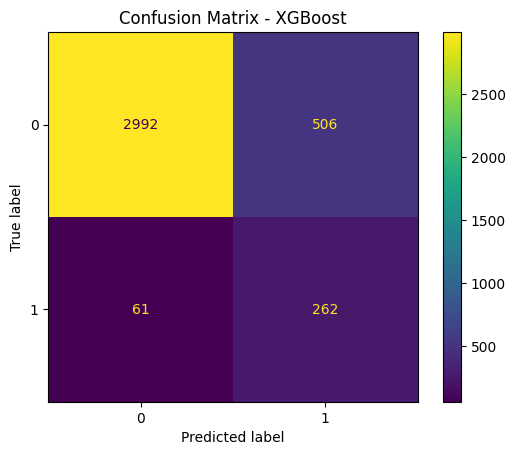

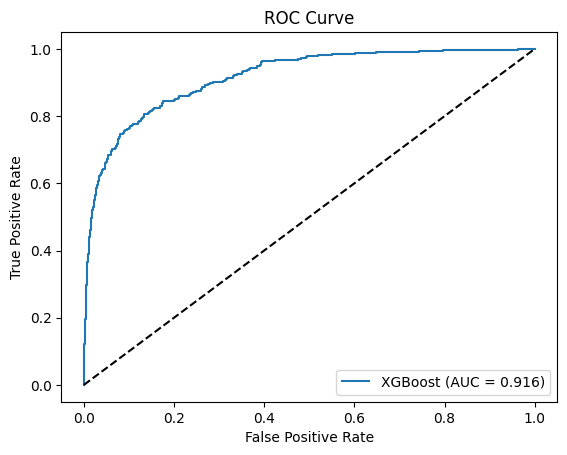

In [ ]:
# === 1.Import Library ===
from xgboost import XGBClassifier

# ==== 2. Load data ====
agg_final = df.copy()   # replace df with your dataframe
if 'Tenure_Group' in agg_final.columns:
    agg_final = agg_final.drop(columns=['Tenure_Group'])  # remove Tenure_Group

# ==== 3. Split X / y ====
y = agg_final['Target']
X = agg_final.drop(columns=['Target'])

# ==== 4. Identify numeric and categorical features ====
numeric_features = X.select_dtypes(include=['number']).columns.tolist()
cat_features = X.select_dtypes(include=['object','category']).columns.tolist()

# ==== 5. Preprocessing pipelines ====
numeric_transformer = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', cat_transformer, cat_features)
], remainder='drop')

# ==== 6. Train-test split ====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==== 7. XGBoost with SMOTE ====
steps = [
    ('preproc', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1])  # handles imbalance
    ))
]

pipeline = ImbPipeline(steps=steps)

# ==== 8. Hyperparameter tuning ====
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 5, 7],
    'clf__learning_rate': [0.01, 0.1, 0.2],
    'clf__subsample': [0.8, 1.0],
    'clf__colsample_bytree': [0.8, 1.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

best_model_xgb = grid.best_estimator_
print("Best hyperparameters:", grid.best_params_)

# ==== 9. Predict & evaluate ====
y_pred = best_model_xgb.predict(X_test)
y_proba = best_model_xgb.predict_proba(X_test)[:,1]

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

# ROC AUC
auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", auc)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - XGBoost")
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc:.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


`For XGBoost Model`
The XGBoost model achieved strong performance with an **AUC of 0.916** and overall **accuracy of 85%**.  
It shows excellent detection of the majority class (0) and high recall for the minority class (1).  
However, precision for class 1 is low, leading to more false positives.  

`Key Insights`  
1. **AUC = 0.916** → Model is highly effective at distinguishing between classes.  
2. **Accuracy = 85%** → Good overall predictive strength.  
3. **Class 1 Recall = 81%** → Most positives are detected, minimizing false negatives.  
4. **Class 1 Precision = 34%** → Many false positives occur when predicting positives.  
5. **Confusion Matrix shows imbalance** → Model favors majority class (0), but still captures minority class (1) reasonably well.  


Error: 'best_model_rf' or its components are not fitted. Please run the Random Forest model training cell first.


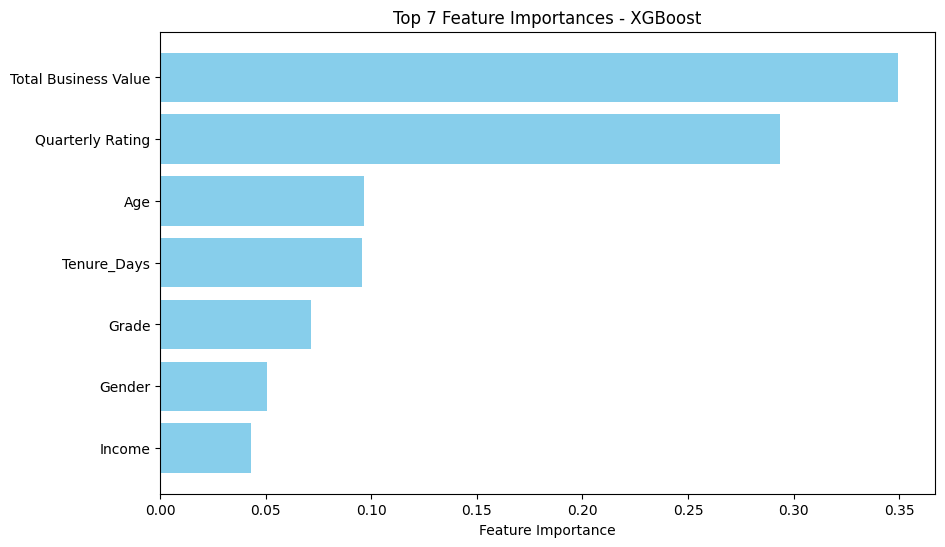

In [ ]:
# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['number']).columns.tolist()
cat_features = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist() # Include boolean as they were created from one-hot encoding

# Categorical features after one-hot encoding - access from the fitted pipeline
# Ensure best_model_xgb has been fitted (e.g., by running the Random Forest cell)
try:
    cat_features_encoded = best_model_rf.named_steps['preproc']\
        .named_transformers_['cat']\
        .named_steps['onehot'].get_feature_names_out(cat_features)
except AttributeError:
    print("Error: 'best_model_rf' or its components are not fitted. Please run the Random Forest model training cell first.")
    cat_features_encoded = [] # Initialize as empty to avoid further errors


# Combine all feature names
all_features = np.concatenate([numeric_features, cat_features_encoded])

# Filter out 'Target' if it somehow ended up in all_features (shouldn't happen with the way X is created, but as a safeguard)
if 'Target' in all_features:
    all_features = all_features[all_features != 'Target']


# ==== 2. Get feature importances ====
# Ensure the classifier is fitted before accessing feature_importances_
try:
    importances = best_model_xgb.named_steps['clf'].feature_importances_
except AttributeError:
    print("Error: Random Forest classifier is not fitted. Please run the Random Forest model training cell first.")
    importances = [] # Initialize as empty

# Make sure importances and all_features have the same length before creating DataFrame
if len(all_features) > 0 and len(importances) == len(all_features):
    # ==== 3. Create dataframe for plotting ====
    feat_df = pd.DataFrame({'feature': all_features, 'importance': importances})
    feat_df = feat_df.sort_values(by='importance', ascending=False).head(20)  # top 20

    # ==== 4. Plot ====
    plt.figure(figsize=(10,6))
    plt.barh(feat_df['feature'][::-1], feat_df['importance'][::-1], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.title('Top 7 Feature Importances - XGBoost')
    plt.show()
else:
    print("Could not generate feature importances plot due to previous errors or mismatch in feature/importance counts.")

`XGBoost Feature Importance Analysis`

The chart shows the Top 7 most important features identified by the XGBoost model. Feature importance reflects how much each feature contributes to predicting the target variable. Higher importance values indicate stronger influence.

`Key Observations:`

**Total Business Value (~0.35)**  
- Most influential predictor.  
- Highlights that overall business value strongly drives the model’s predictions.  

**Quarterly Rating (~0.29)**  
- Second most important feature.  
- Suggests that performance/satisfaction ratings have high predictive power.  

**Age And Tenure_Days (~0.10)**  
- Both contribute moderately.  
- Indicates that customer age and duration of relationship impact outcomes, but less than value or rating.  

**Grade , Gender and Income (~0.04)**  
- Least influential features.  
- These variables add minimal predictive value compared to business-related features.  

`Insights:`

- The model relies most on **Total Business Value** and **Quarterly Rating** for predictions.  
- **Demographic attributes** (Age, Gender, Income) play a much smaller role.  
- Results highlight that **business and performance metrics are stronger predictors** compared to personal or demographic information.  


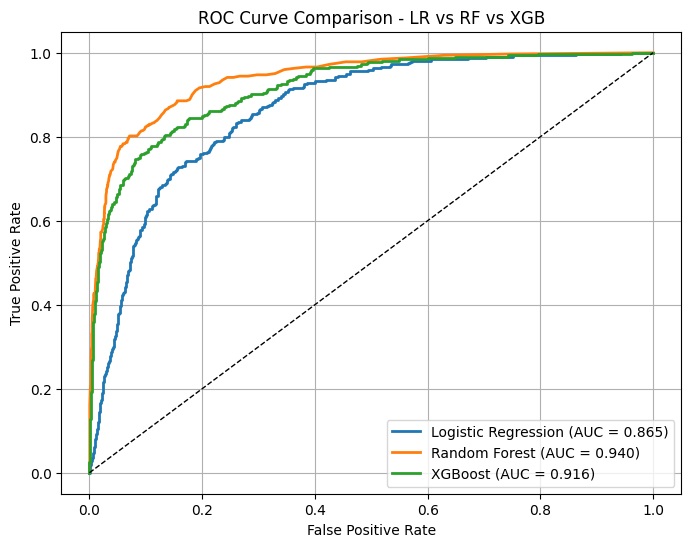

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# ==== 1. Predict probabilities ====
# Logistic Regression
y_proba_lr = best_model_lr.predict_proba(X_test)[:,1]  # replace best_model_lr with your LR grid.best_estimator_

# Random Forest
y_proba_rf = best_model_rf.predict_proba(X_test)[:,1]  # replace best_model_rf with your RF grid.best_estimator_

# XGBoost
y_proba_xgb = best_model_xgb.predict_proba(X_test)[:,1]  # replace best_model_xgb with your XGB grid.best_estimator_

# ==== 2. Calculate ROC AUC ====
auc_lr = roc_auc_score(y_test, y_proba_lr)
auc_rf = roc_auc_score(y_test, y_proba_rf)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)

# ==== 3. ROC curves ====
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', linewidth=2)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.3f})', linewidth=2)

plt.plot([0,1],[0,1],'k--', linewidth=1)  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - LR vs RF vs XGB')
plt.legend()
plt.grid(True)
plt.show()


# Model Selection Conclusion

After comparing Logistic Regression, Random Forest, and XGBoost, the results are:

- **Random Forest**
  - AUC: **0.940** (best)
  - Accuracy: **94.3%**
  - Balanced performance with strong precision, recall, and F1 for both classes.
  - Best general-purpose model.

- **XGBoost**
  - AUC: **0.916**
  - Accuracy: **85.2%**
  - Very high recall for minority class (0.8111) but much lower precision.
  - Useful when **catching as many positives as possible** is more important, even if it means more false positives.

- **Logistic Regression**
  - AUC: **0.865** (lowest)
  - Accuracy: **70.7%**
  - Very high recall for minority class (0.8700) but extremely low precision (0.2068).
  - Not suitable as the main model, but can serve as a **baseline**.

## Final Recommendation:
- Select `Random Forest` as the primary model due to its **highest accuracy, best AUC, and overall balanced performance**.  
- Use `XGBoost` if the business goal prioritizes recall** (minimizing false negatives, e.g., catching all risky cases).  
- Logistic Regression is not recommended for deployment.  


# Model Insights & Recommendations

## Key Insights:
- **Random Forest** delivers the **best overall performance** with highest accuracy (94.3%) and AUC (0.940).  
- **XGBoost** provides **very high recall (0.8111)** for the minority class, which is valuable if identifying positives is critical, but its precision is low.  
- **Logistic Regression** has the **lowest accuracy (70.7%) and AUC (0.865)**, with poor precision, making it less reliable.  

## Feature Importance (from XGBoost & Random Forest):
1. `Total Business Value` – strongest driver of predictions.  
2. `Quarterly Rating` – highly predictive, reflects customer performance/satisfaction.  
3. `Tenure_Days` – customer longevity is an important indicator.  
4. `Age` and `Income` – moderate influence, demographic/economic factors matter but less than business metrics.  
5. `Grade` and `Gender` – minimal contribution, can potentially be excluded.  

## Recommendations:
- Choose `Random Forest` for deployment due to its strong balance of precision, recall, and accuracy.  
- Consider `XGBoost` if the priority is **capturing as many positives as possible**, even at the cost of more false positives.  
- **Focus on business-driven features** (Total Business Value, Quarterly Rating, Tenure) for decision-making.  
- **De-emphasize weak features** (Grade, Gender) to simplify the model without losing much predictive power.  
- **Further improvement:** Try feature engineering around **customer value trends** and **time-based behaviors**, as they strongly influence predictions.  
